In [292]:
# re-written from Fred's github

In [109]:
from scipy.stats import bernoulli
import numpy as np
from collections import namedtuple
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

In [110]:
Results = namedtuple('Results',('p','s1','reward','Done'))
r = Results(0.5,20,0,False)
[r,r]

[Results(p=0.5, s1=20, reward=0, Done=False),
 Results(p=0.5, s1=20, reward=0, Done=False)]

In [285]:

# gamblers problem. 
def gambers_problem(goal,ph):
    # returns a dictionnary that is indexed by s,a and returns new state with some p
    
    def results(s,a):
        results = [] # list for results 
        if s==0:
            return[Results(1,0,0,True)] # game over 
        
        if not 0 < a <= s:
            # Penalty for illegal bets.
            # this is necessary for smoothness of results # 
            return [Results(1, 0, -1, True)]
        
        for p,s1 in [(ph,s+a),(1-ph,s-a)]:
            
            if s1<=0: # if terminal states, list is just one option
                results.append(Results(p,0,0,True)) 
            elif s1>=goal:
                results.append(Results(p,0,1,True))
            else:# otherwise its two states. 
                results.append(Results(p,s1,0,False)) 
        
        return(results)
        
    P = {}
    for s in range(goal):
        P[s]={}
        for a in range(s+1): # only can bet up to s
            P[s][a] =results(s,a) # a list of possible results 
            
            
    return(P)
     

In [279]:

def expected_value(V,results,discount=1):
    """expected value of a list of possible results of an action"""
    return np.sum(p*(r+discount*V[s1]) for p,s1,r,_ in results)

def value_iteration(P,discount=1,epsilon=0.001,max_iters=10000):
    
    V = np.random.rand(len(P.keys())) # initialize value to 0

    for i in range(1,max_iters+1):
        delta=0
        for state in P.keys():
            v = V[state].copy()
            V[state] = np.max([expected_value(V,P[state][action]) for action in P[state].keys()])
            delta = np.max([delta,v-V[state]])
        if delta<epsilon:
            return(V)

    print('failed')
    return(V) 

def value_policy(P, V):
    """Policy that greedily maximizes expected value.
    
    The optimal policy if V is the optimal value function."""
    return np.array([max(P[s], key=lambda a: expected_value(V, P[s][a]))
                     for s in P])
    
    #policy


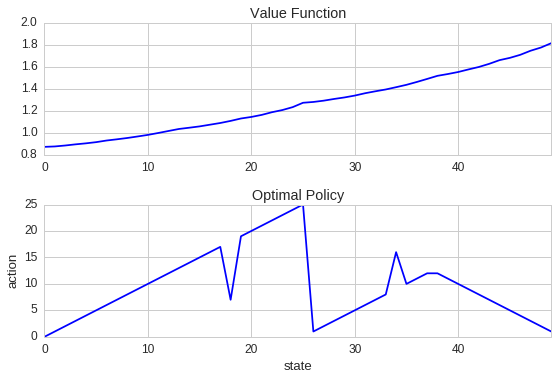

In [294]:
P = gambers_problem(goal=50,ph=0.4)
V = value_iteration(P)
policy = value_policy(P,V)
states = np.arange(len(P))

fig, axes = plt.subplots(2)
plt.sca(axes[0])
plt.plot(V,color='b')

plt.xlim(0,states.max())
plt.title('Value Function')

plt.sca(axes[1])
plt.plot(states,policy,color='b')
plt.xlim(0,states.max())
plt.title('Optimal Policy')
plt.xlabel('state')
plt.ylabel('action')
plt.tight_layout()
None